In [2]:
import os
import sys

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

filter_test: /usr/include/eigen3/Eigen/src/Core/Block.h:120: Eigen::Block<XprType, BlockRows, BlockCols, InnerPanel>::Block(XprType&, Eigen::Index) [with XprType = Eigen::Matrix<double, -1, 4, 1>; int BlockRows = 1; int BlockCols = 4; bool InnerPanel = true; Eigen::Index = long int]: Assertion `(i>=0) && ( ((BlockRows==1) && (BlockCols==XprType::ColsAtCompileTime) && i<xpr.rows()) ||((BlockRows==XprType::RowsAtCompileTime) && (BlockCols==1) && i<xpr.cols()))' failed.
Aborted (core dumped)


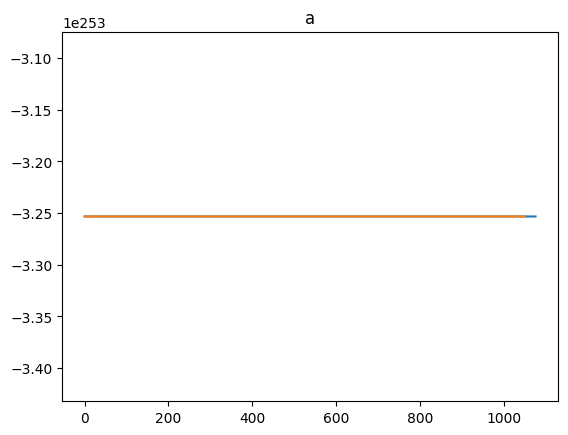

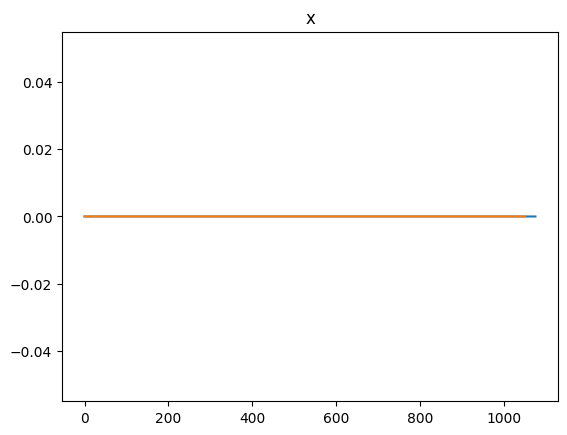

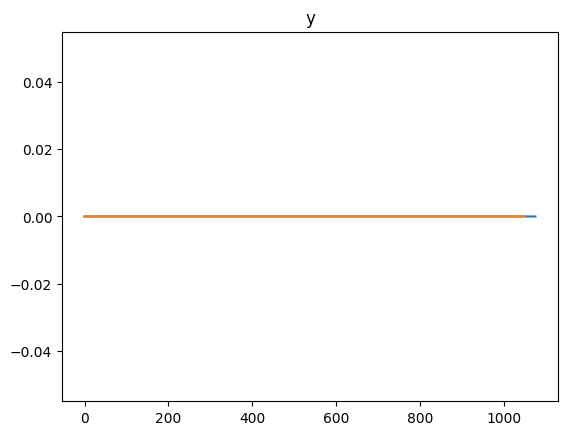

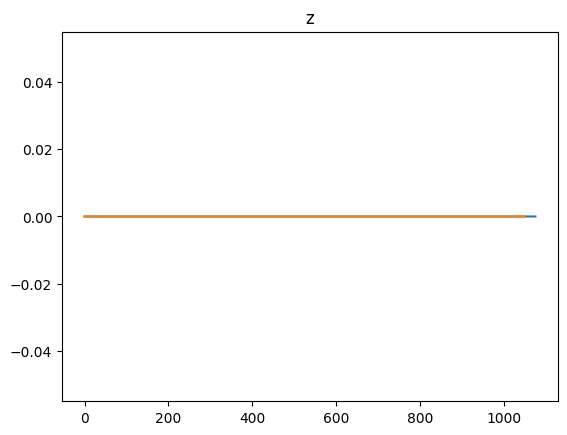

In [3]:
run = '8'
h_thr = 1
v_thr = 1
a_thr = 0.1
hold_m = 4

raw_file = f"../logs/real/raw/{run}.log"
filt_file = f"../logs/real/filt/{run}.log"

os.system(f"rm {filt_file}")
os.system("../build/filter_test {} {} {:.3f} {:.3f} {:.3f} {:.3f}".format(raw_file, filt_file, h_thr, v_thr, a_thr, hold_m))


df = pd.read_csv(raw_file, header=None, names=['tag', 'ts', 'v1', 'v2', 'v3', 'v4'])
df = df[df.tag == 'pos']
df = df.rename({'v1' : 'x', 'v2' : 'y', 'v3' : 'z', 'v4' : 'a'}, axis=1)

df_filt = pd.read_csv(filt_file, header=None, names=['tag', 'ts', 'v1', 'v2', 'v3', 'v4'])
df_filt = df_filt[df_filt.tag == 'pos']
df_filt = df_filt.rename({'v1' : 'x', 'v2' : 'y', 'v3' : 'z', 'v4' : 'a'}, axis=1)


dt = 0.02
for v in ['a', 'x', 'y', 'z']:
	plt.plot(df.ts, df[v])
	plt.plot(df_filt.ts, df_filt[v])
	plt.title(v)
	plt.show()